In [1]:
import pyaerocom as pya
pya.change_verbosity('critical')

2018-09-26 14:04:02,902:WARNING:
basemap extension library is not installed (or cannot be imported. Some features will not be available
2018-09-26 14:04:03,674:WARNING:
geopy library is not available. Aeolus data read not enabled


## Results overview of analysis script

This notebook is based on netCDF files that contain data that has been colocated. The colocated data files can be created using the [ANALYSIS_SCRIPT.py](https://github.com/metno/pyaerocom-synthesis/blob/master/ANALYSIS_SCRIPT.py) file which is part of this repository. 

### Setup paths and notebook options

In [5]:
import os

OUT_BASE = 'output/' 

DATA_DIR = OUT_BASE + 'colocated_data' #directory containing colocated data files

##### Check read / write access

In [6]:
os.access(OUT_BASE, os.W_OK)

True

#### Comment on colocated data files

The directory containing colocated data files (*DATA_DIR*) contains sub-directories for each model available. The colocated data files are named using the following convention:

*<var_name>_REF-<obsnetwork_id>_MOD-<model_id>_<ts_type_source>_<start_date>_<stop_date>_<ts_type>_<filter_name>_COLL.nc*

For instance:

*abs550aer_REF-AeronetInvV3Lev2.daily_MOD-INCA-BCext_CTRL2016-PD-3hourly_20100101_20101231_monthly_WORLD-noMOUNTAINS_COLL.nc*

#### Output files

In [6]:
RESULT_TABLE = OUTPUT_DIR + 'result_table.csv'

#### Options

In [7]:
RELOAD_RESULTS = False

### Import results 

In [9]:
if not os.path.exists(RESULT_TABLE):
    RELOAD_RESULTS = True    

In [ ]:
from helpers.io import ReadColocatedData
reader = ReadColocatedData(DATA_DIR)

if RELOAD_RESULTS:
    table = reader.compute_statistics_table()
    table.to_csv(RESULT_TABLE)
else:
    table = reader.read_statistics_table_csv(RESULT_TABLE)
table

## Results

This section contains results from the analysis that can be performed using the script ``EVAL_SCRIPT.py``. The following lines read all result CSV files that are stored in the result folder, imports them and extracts **Bias (nmb), RMS and Pearson R coefficient)** as one multiindex dataframe.

In [7]:
from helpers.widgets import PlotScatter
p = PlotScatter(sorted(reader.files))
p()

In [8]:
df = table
import pandas as pd

### Analysis of monthly results

In [9]:
monthly = df[df['Freq'] == 'monthly']
monthly

Freq  \
Model                          Year Variable    Obs                               
CAM5.3-Oslo_AP3-CTRL2016-PD    2010 abs550aer   AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV3Lev2.daily  monthly   
                                    od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550gt1aer AeronetSDAV3Lev2.daily  monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
CNRM-AESM2Nud_AP3-CTRL2016-PD  2010 od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
CNRM-AESM2_AP3-CTRL2016-PD     2010 od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
ECHAM6-HAM2_AP3-CTRL2016-PD    2010 od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
ECHAM6-SALSA_CTRL2016-PD       2008 abs550aer   AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV3Lev2.daily  monthly   
                                    od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
                               2010 abs550aer   AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV3Lev2.daily  monthly   
                                    od550aer    AeronetSunV3Lev2.daily  monthly   
                                                AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.aqua             monthly   
...                                                                         ...   
INCA-BCin_CTRL2016-PD          2008 od550lt1aer AeronetSDAV3Lev2.daily  monthly   
                               2010 abs550aer   AeronetInvV3Lev2.daily  monthly   
                                    ang4487aer  AeronetSunV3Lev2.daily  monthly   
                                    od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
INCA_CTRL2016-PD               2010 od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
                                    od550gt1aer AeronetSDAV3Lev2.daily  monthly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  monthly   
SPRINTARS-T106_AP3-CTRL2016-PD 2010 od550aer    AeronetSunV3Lev2.daily  monthly   
                                                MODIS6.aqua             monthly   
                                                MODIS6.terra            monthly   
SPRINTARS-T213_AP3-CTRL2016-PD 2008 abs550aer   AeronetInvV3Lev2.daily  monthly   
        

#### Bias

In [10]:
bias = pd.pivot_table(monthly, values='Bias', columns=['Variable', 'Obs'],
                      index=['Model', 'Year'])

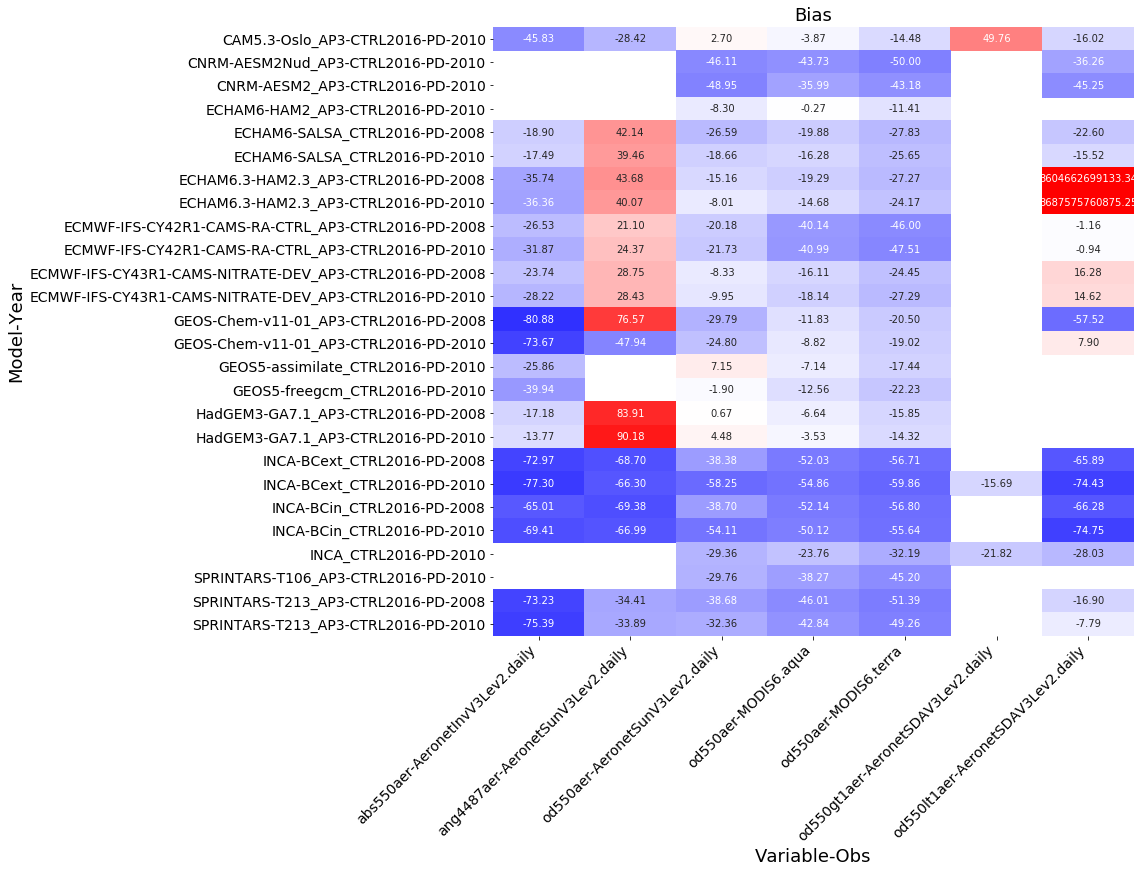

In [11]:
ax = pya.plot.heatmaps.df_to_heatmap(bias, 
                                     color_rowwise=False,
                                     figsize=(16, 12), vmin=-100, vmax=100)
ax.set_title('Bias')
ax.figure.savefig(OUTPUT_DIR + 'bias_monthly.png')

#### Fractional gross error (FGE)

In [12]:
fge = pd.pivot_table(monthly, values='FGE', columns=['Variable', 'Obs'],
                      index=['Model', 'Year'])

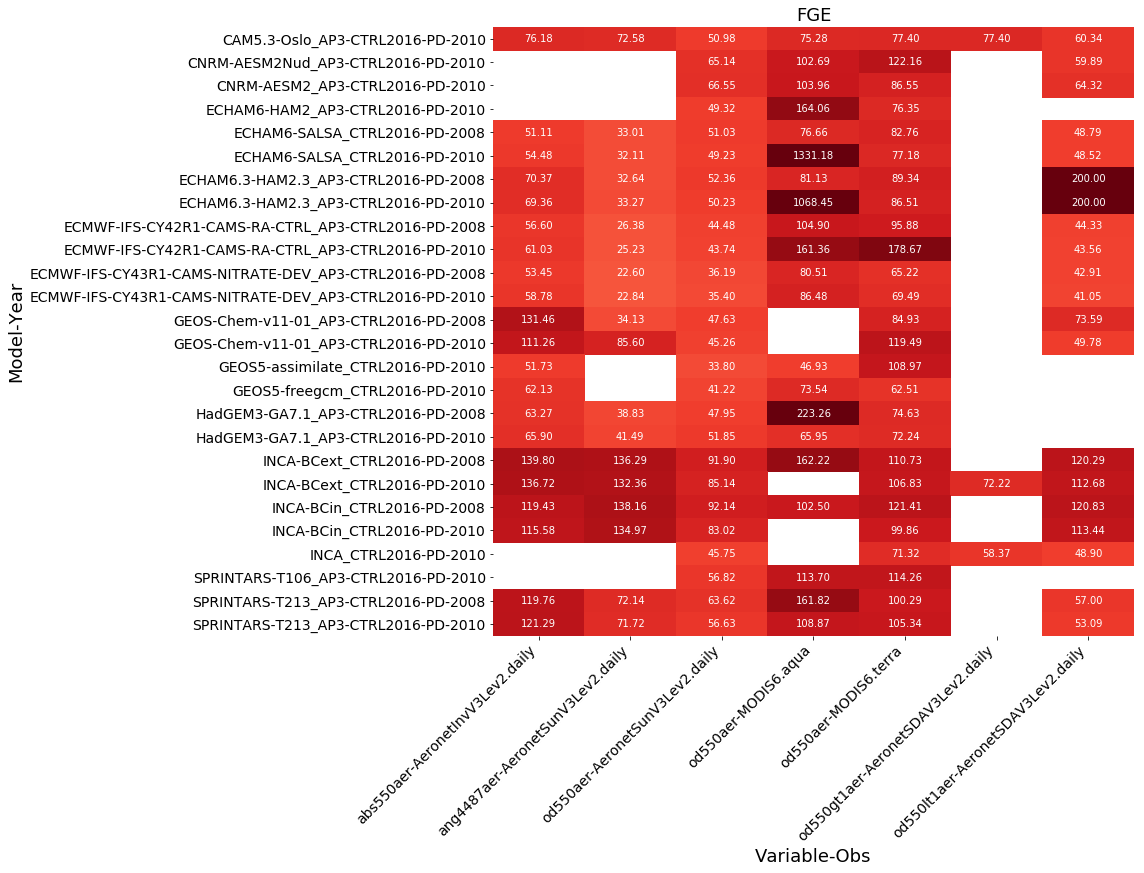

In [13]:
ax = pya.plot.heatmaps.df_to_heatmap(fge, 
                                     cmap='Reds',
                                     color_rowwise=False,
                                     figsize=(16, 12), vmax=200)
ax.set_title('FGE')
ax.figure.savefig(OUTPUT_DIR + 'fge_monthly.png')

### Analysis of yearly results

In [14]:
yearly = df[df['Freq'] == 'yearly']
yearly

Freq  \
Model                          Year Variable    Obs                              
CAM5.3-Oslo_AP3-CTRL2016-PD    2010 abs550aer   AeronetInvV3Lev2.daily  yearly   
                                    ang4487aer  AeronetSunV3Lev2.daily  yearly   
                                    od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
                                    od550gt1aer AeronetSDAV3Lev2.daily  yearly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  yearly   
CNRM-AESM2Nud_AP3-CTRL2016-PD  2010 od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  yearly   
CNRM-AESM2_AP3-CTRL2016-PD     2010 od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  yearly   
ECHAM6-HAM2_AP3-CTRL2016-PD    2010 od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
ECHAM6-SALSA_CTRL2016-PD       2008 abs550aer   AeronetInvV3Lev2.daily  yearly   
                                    ang4487aer  AeronetSunV3Lev2.daily  yearly   
                                    od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  yearly   
                               2010 abs550aer   AeronetInvV3Lev2.daily  yearly   
                                    ang4487aer  AeronetSunV3Lev2.daily  yearly   
                                    od550aer    AeronetSunV3Lev2.daily  yearly   
                                                AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.aqua             yearly   
...                                                                        ...   
INCA-BCin_CTRL2016-PD          2008 od550lt1aer AeronetSDAV3Lev2.daily  yearly   
                               2010 abs550aer   AeronetInvV3Lev2.daily  yearly   
                                    ang4487aer  AeronetSunV3Lev2.daily  yearly   
                                    od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  yearly   
INCA_CTRL2016-PD               2010 od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
                                    od550gt1aer AeronetSDAV3Lev2.daily  yearly   
                                    od550lt1aer AeronetSDAV3Lev2.daily  yearly   
SPRINTARS-T106_AP3-CTRL2016-PD 2010 od550aer    AeronetSunV3Lev2.daily  yearly   
                                                MODIS6.aqua             yearly   
                                                MODIS6.terra            yearly   
SPRINTARS-T213_AP3-CTRL2016-PD 2008 abs550aer   AeronetInvV3Lev2.daily  yearly   
                                    ang4487aer  AeronetS

#### Bias

In [15]:
bias = pd.pivot_table(yearly, values='Bias', columns=['Variable', 'Obs'],
                      index=['Model', 'Year'])

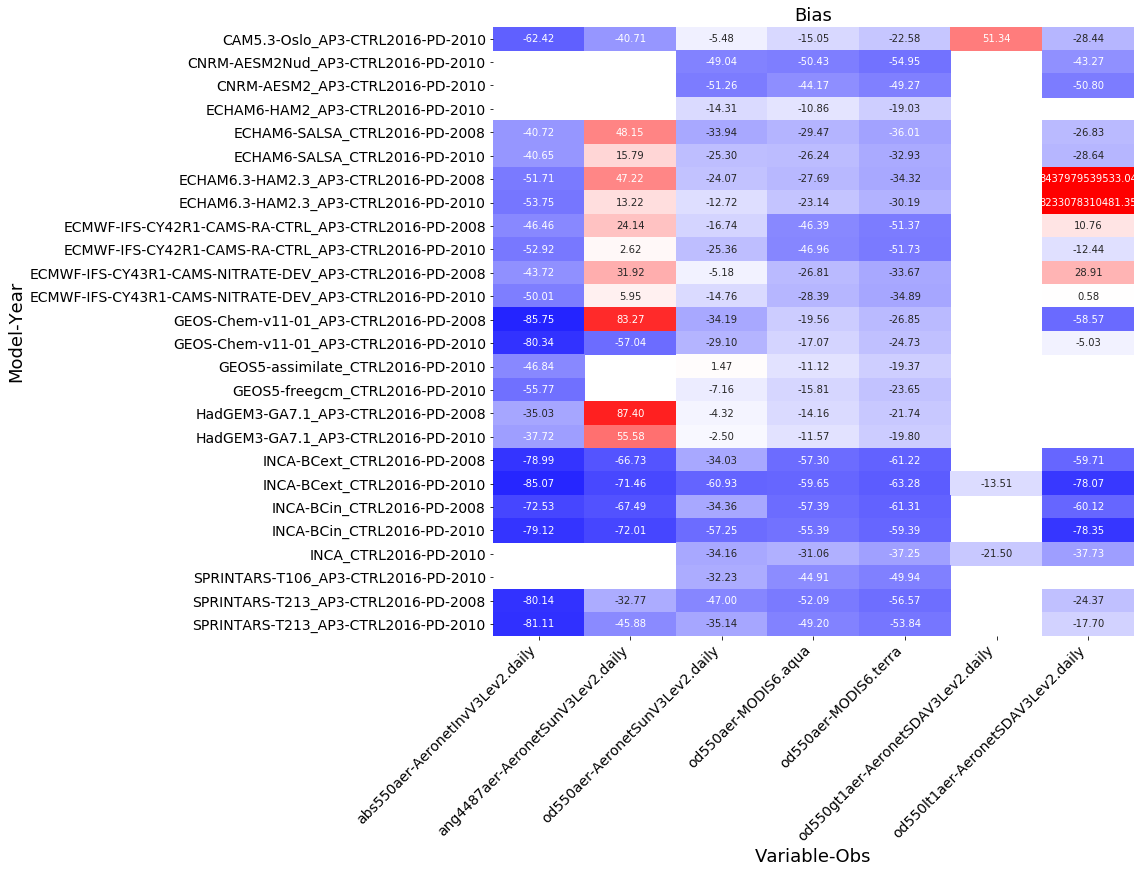

In [16]:
ax = pya.plot.heatmaps.df_to_heatmap(bias, 
                                     color_rowwise=False,
                                     figsize=(16, 12), vmin=-100, vmax=100)
ax.set_title('Bias')
ax.figure.savefig(OUTPUT_DIR + 'bias_yearly.png')

#### Fractional gross error (FGE)

In [17]:
fge = pd.pivot_table(yearly, values='FGE', columns=['Variable', 'Obs'],
                      index=['Model', 'Year'])

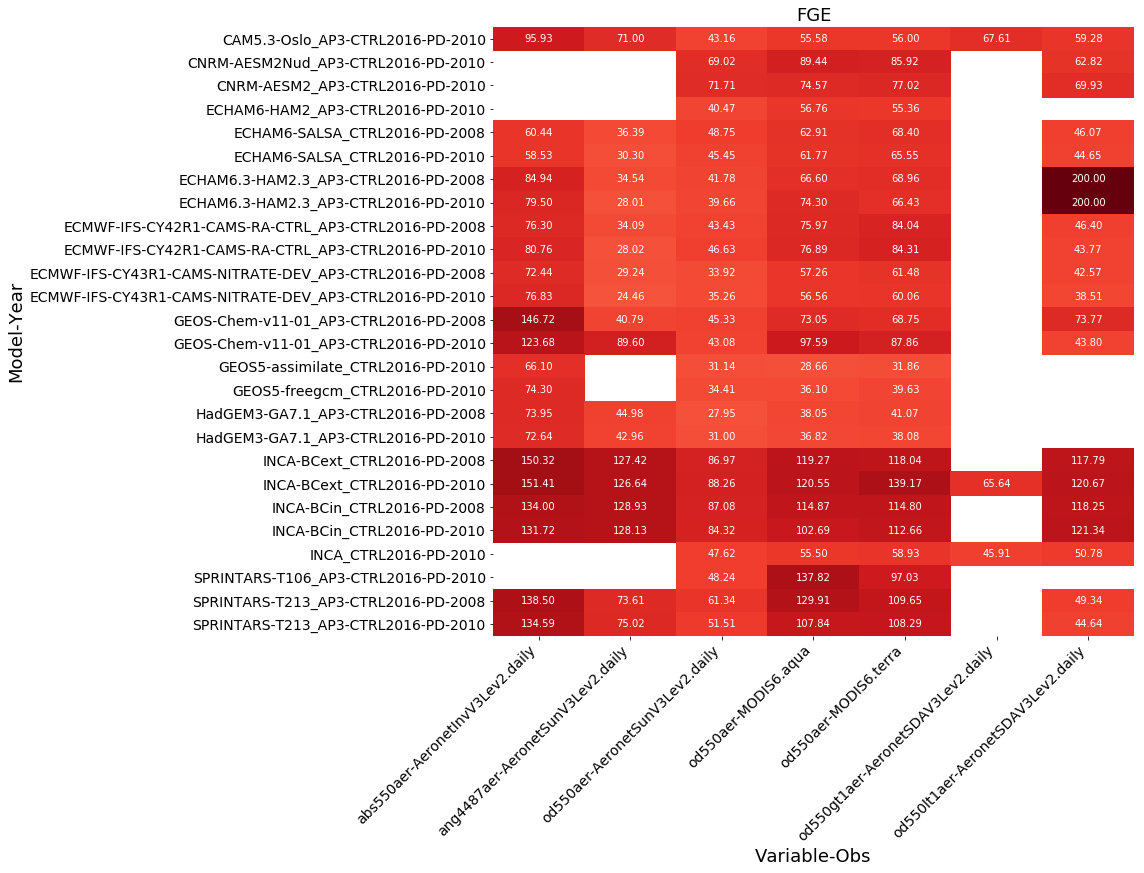

In [18]:
ax = pya.plot.heatmaps.df_to_heatmap(fge, 
                                     cmap='Reds',
                                     color_rowwise=False,
                                     figsize=(16, 12), vmax=200)
ax.set_title('FGE')
ax.figure.savefig(OUTPUT_DIR + 'fge_yearly.png')